## Exercice 1 : dictionnaire et API

On dispose d'une API (Application Programming Interface) mise à disposition par les services de l'Etat et permettant de récupérer un certain nombre d'informations à partir d'une adresse postale (formatée avec des caractères <code>+</code> entre les différents termes de la recherche).  


Une requête à cette API renvoie des données au format JSON (Java Script Object Notation). Ce format de données permet d'utiliser conjointement des dictionnaires et des listes : on peut ainsi avoir la valeur d'un dictionnaire qui est une liste contenant elle même un dictionnaire contenant lui même etc.


Voici un exemple (la valeur associée à la clef <code>'coordinates'</code> est le couple de coordonnées <code>[longitude, latitude]</code> en degrés décimaux) :

In [1]:
import requests

adresse_formatee = '110+rue+de+Grenelle+75007+Paris'
r = requests.get("https://api-adresse.data.gouv.fr/search/?q=" + adresse_formatee)
donnees = r.json()
donnees


{'type': 'FeatureCollection',
 'version': 'draft',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [2.320814, 48.85663]},
   'properties': {'label': '110 Rue de Grenelle 75007 Paris',
    'score': 0.9566517682452214,
    'housenumber': '110',
    'id': '75107_4314_00110',
    'type': 'housenumber',
    'x': 650166.22,
    'y': 6862057.92,
    'importance': 0.5231694506974356,
    'name': '110 Rue de Grenelle',
    'postcode': '75007',
    'citycode': '75107',
    'city': 'Paris',
    'district': 'Paris 7e Arrondissement',
    'context': '75, Paris, Île-de-France',
    'street': 'Rue de Grenelle'}}],
 'attribution': 'BAN',
 'licence': 'ETALAB-2.0',
 'query': '110 rue de Grenelle 75007 Paris',
 'limit': 5}

<div class ="alert alert-info">

Ecrire une fonction :
- qui prend en paramètres une chaine de caractères correspondant à une adresse postale formatée avec des <code>+</code>,
- qui renvoie un 2-uplet des coordonnées GPS de l'adresse correspondante.  


On ne se préoccupera pas des éventuelles erreurs qui pourraient être liées à une adresse non répertoriée.


<div class = "alert alert-danger">

# CORRECTION

In [2]:
import requests


def fournir_coordonnees_gps_a_partir_adresse(adresse_formatee):
    r = requests.get("https://api-adresse.data.gouv.fr/search/?q=" + adresse_formatee)
    donnees = r.json()
    longitude = donnees['features'][0]['geometry']['coordinates'][0]
    latitude = donnees['features'][0]['geometry']['coordinates'][1]
    return (latitude, longitude)
    

fournir_coordonnees_gps_a_partir_adresse('48+route+de+Blois+Lailly+en+Val+45740')

(47.757376, 1.674598)

## Exercice 2 : EXIF

La fonction ci-dessous permet de renvoyer les donnees exif d'une image.  

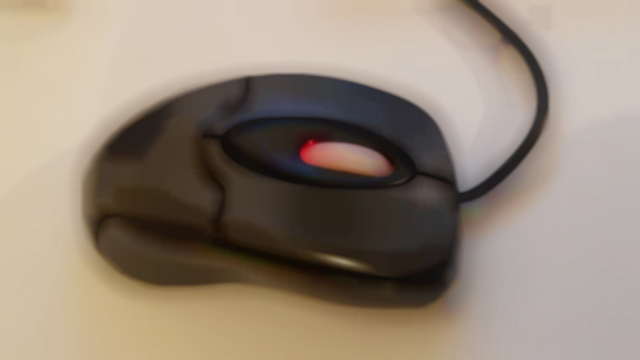

{'ExifVersion': b'0220',
 'ComponentsConfiguration': b'\x01\x02\x03\x00',
 'ShutterSpeedValue': 3.64,
 'DateTimeOriginal': '2020:02:12 23:57:25',
 'DateTimeDigitized': '2020:02:12 23:57:25',
 'ApertureValue': 1.53,
 'BrightnessValue': -1.01,
 'ExposureBiasValue': 0.0,
 'MaxApertureValue': 1.53,
 'MeteringMode': 2,
 'Flash': 0,
 'FocalLength': 4.2,
 'UserComment': b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 'ColorSpace': 1,
 'ExifImageWidth': 640,
 'SceneCaptureType': 0,
 'SubsecTime': '0329',
 'SubsecTimeOriginal': '0329',
 'SubsecTimeDigitized': '0329',
 'ExifImageHeight': 360,
 'Make': 'samsung',
 'Model': 'SM-G930F',
 'Orientation': 6,
 'YCbCrPositioning': 1,
 'ExposureTime': 0.07692307692307693,
 'ExifInteroperabilityOffset': 852,
 'XResolution': 72.0,
 'FNumber': 1.7,
 'YResolution': 72.0,
 'ImageUniqueID': 'C12LLJB18VM C12LLLC01GM\n',
 'ExposureProgram': 2,
 'GPSInfo': {0: b'\x02\x02\x00\x00',
  1: 'N',
  2: (47.0, 45.0, 27.0),
  3: 'E',
  4: (1.0, 40.0, 29.0),
  5:

In [3]:
import PIL.Image
from IPython.display import display
import PIL.ExifTags

def renvoyer_donnees_exif(chemin_fichier, afficher = True):
    '''
    Renvoie les données exif de l'image dont le chemin d'accès est spécifié par
    chemin_fichier. Le booléen afficher indique si l'on souhaite afficher l'image.
    '''
    img = PIL.Image.open(chemin_fichier)
    donnees_exif = { PIL.ExifTags.TAGS[k]:v for k, v in img._getexif().items() if k in PIL.ExifTags.TAGS}
    display(img)
    img.close()
    return donnees_exif

donnees_exif = renvoyer_donnees_exif('./images_exif/souris_gps.jpg')
donnees_exif

Sur cet exemple on peut lire que les coordonnées GPS sont :  
- 47 degrés 45 minutes 27 secondes de latitude Nord,
-  1 degré  40 minutes 29 secondes de longitude Est.

<div class = "alert alert-info">  


Ecrire une fonction <code>renvoyer_lat_et_lon</code> qui :
- prend en paramètre les données exif renvoyées par la fonction <code>renvoyer_donnees_exif</code>
- renvoie la latitude et la longitude exprimées en degrés, minutes, secondes,


Les structures de données à utiliser pour renvoyer latitude et longitude sont laissées à votre réflexion (tableau, p-uplet, p-uplet de p-uplet, dictionnaire, dictionnaire de p-uplet, p-uplet de dictionnaires, dictionnaire de dictionnaires ...)

<div class = "alert alert-danger">

# CORRECTION

In [4]:
import PIL.Image
from IPython.display import display
import PIL.ExifTags

def renvoyer_donnees_exif(chemin_fichier, afficher = False):
    '''
    Renvoie les données exif de l'image dont le chemin d'accès est spécifié par
    chemin_fichier. Le booléen afficher indique si l'on souhaite afficher l'image.
    '''
    img = PIL.Image.open(chemin_fichier)
    donnees_exif = { PIL.ExifTags.TAGS[k]:v for k, v in img._getexif().items() if k in PIL.ExifTags.TAGS}
    if afficher:
        display(img)
    img.close()
    return donnees_exif

def renvoyer_lat_et_lon(chemin_fichier):
    # on récupère les données exif
    donnees_exif = renvoyer_donnees_exif(chemin_fichier)
    # on récupère le tuple de latitude, sur l'exemple c'est : ((47, 1), (45, 1), (27, 1))
    tuple_lat = donnees_exif['GPSInfo'][2]
    # on extrait les 3 composantes de la latitude qu'on met dans un tuple 
    latitude = (tuple_lat[0][0], tuple_lat[1][0], tuple_lat[2][0])
    # on récupère le tuple de longitude, sur l'exemple c'est : ((1, 1), (40, 1), (29, 1))
    tuple_lon = donnees_exif['GPSInfo'][4]
    # on extrait les 3 composantes de la longitude qu'on met dans un tuple 
    longitude = (tuple_lon[0][0], tuple_lon[1][0], tuple_lon[2][0])
    return latitude, longitude

def renvoyer_lat_et_lon_v2(chemin_fichier):
    # on récupère les données exif
    donnees_exif = renvoyer_donnees_exif(chemin_fichier)
    # on récupère le tuple de latitude, sur l'exemple c'est : ((47, 1), (45, 1), (27, 1))
    tuple_lat = donnees_exif['GPSInfo'][2]
    # on extrait les 3 composantes de la latitude qu'on met dans une chaine de caractères
    latitude = str(tuple_lat[0][0]) + ' D ' + str(tuple_lat[1][0]) + ' M ' + str(tuple_lat[2][0]) + ' S '
    # on récupère le tuple de longitude, sur l'exemple c'est : ((1, 1), (40, 1), (29, 1))
    tuple_lon = donnees_exif['GPSInfo'][4]
    # on extrait les 3 composantes de la longitude qu'on met dans une chaine de caractères
    longitude = str(tuple_lon[0][0]) + ' D ' + str(tuple_lon[1][0]) + ' M ' + str(tuple_lon[2][0]) + ' S '
    return 'La latitude est : ' + latitude + ' et la longitude est : ' + longitude

A = renvoyer_lat_et_lon('./images_exif/souris_gps.jpg')
B = renvoyer_lat_et_lon_v2('./images_exif/souris_gps.jpg')
print(A)
print(B)

TypeError: 'IFDRational' object is not subscriptable

## Exercice 3 : dictionnaire et JSON en Python

Le fichier <code>./joueurs.json</code> contient des données au format .JSON.  
Ces données correspondent à des données de 5 joueurs nommés par leur pseudonyme. 

<div class = "alert alert-info">

En utilisant la partie "Applications" du cours, écrire une fonction qui :
- prend en paramètre le pseudonyme d'un des joueurs
- ajoute 1 à la valeur associée à la clé <code>'appels'</code> de ce joueur :
    - en ouvrant le fichier <code>./joueurs.json</code>
    - en modifiant la valeur associée à la clé <code>'appels'</code>
    - en sauvegardant la fichier <code>./joueurs.json</code> actualisé.
- renvoie le dictionnaire correspondant au contenu du fichier JSON modifié

<div class = "alert alert-danger">

# CORRECTION

In [ ]:
import json

def afficher_donnees(pseudo):
    fichier_json = open('./joueurs.json', 'r')
    datas = json.load(fichier_json)
    fichier_json.close()
    print(datas[pseudo])

def augmenter_appels_de_un(pseudo):
    # 1) on charge les donnees dans python
    fichier_json = open('./joueurs.json', 'r')
    datas = json.load(fichier_json)
    fichier_json.close()  
    
    # 2) on modifie les données
    datas[pseudo]['appels'] = datas[pseudo]['appels'] + 1
    
    # 3) on sauvegarde les données modifiées dans le fichier
    fichier_json = open('./joueurs.json', 'w')
    json.dump(datas, fichier_json)
    fichier_json.close()
    
afficher_donnees('alatake')
augmenter_appels_de_un('alatake')
afficher_donnees('alatake')